<b> Computational Social Science Project 2 <b>

The aim of this project is to develop machine learning models to predict diabetes rates in US counties. 
We use data from Centers for Disease Control and Prevention (CDC) and the US Census Bureau.

In [1]:
#calling relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing dataset
mydata = pd.read_csv("Diabetes with Population Info by County 2017.csv")

In [3]:
# checking out the dataset
mydata.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
mydata.describe()

,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [5]:
mydata.shape

(3220, 95)

There are 3,220 records (each record represents a county) and 95 features in the dataframe.

In [6]:
x = mydata["Diabetes_Number"]
y = mydata["Obesity_Number"]
z = mydata["race_total population"]

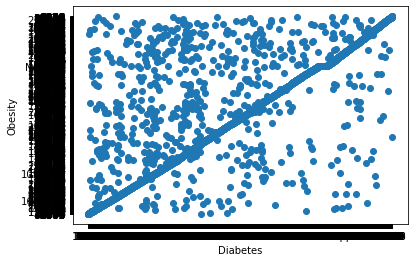

In [7]:
# note from Angel: I added the x and y labels but there are too many tick marks, making the graph unreadable
plt.scatter(x, y)
plt.xlabel('Diabetes')
plt.ylabel('Obesity')
plt.show()

## Section 3

### 3.1 Clean Data

_Remove any features that should not be used in the analysis (for instance, county
name), transform categorical features so they can be used in a machine learning
pipeline, and conduct any other steps necessary to prepare the data for fitting
models._

In [8]:
mydata.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [9]:
# remove features not used in analysis -- county name, state name
mydata = mydata.drop(['County', 'State'], axis = 1)

In [10]:
# there were sneaky values in here that were making many cols non-numeric
mydata = mydata.apply(pd.to_numeric, errors = 'coerce')

Normalize all columns (except CountyFIPS, an id column) by total population.

In [11]:
mydata_norm = mydata.drop(['CountyFIPS','race_total population'], axis = 1).div(mydata['race_total population'], axis='index')
# add back in CountyFIPS and total population
mydata_norm['CountyFIPS'] = mydata['CountyFIPS']
mydata_norm['race_total population'] = mydata['race_total population']

Visualize the distribution of county diabetes rate.

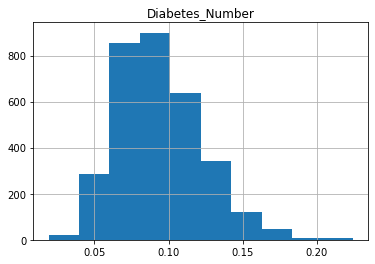

In [12]:
# this produces a county diabetes rate, whose distribution we now visualize
mydata_norm.hist(column='Diabetes_Number')
plt.show() #added this to get rid of the array text on top of the chart

Create a binary variable identifying counties with diabetes rates that are above average. This is what we will predict.

In [13]:
# question from Angel: is "above average" good enough for our model if we want to predict counties with the *highest* diabetes rates?
# alternative measure: predict counties with diabetes rates in the top quartile or quintile of diabetes rates?
mydata_norm['diabetes_above_avg'] = np.where(mydata_norm['Diabetes_Number'] > np.mean(mydata_norm['Diabetes_Number']), 1, 0)
mydata_norm = mydata_norm.dropna(axis=0, how='any')
# remove race total column, which was breaking logreg model
mydata_norm = mydata_norm.drop('race_total population', axis=1)
mydata_norm.head()
# here is the code for top quintile: np.nanquantile(mydata_norm['Diabetes_Number'],q=0.8)
# and top quartile: np.nanquantile(mydata_norm['Diabetes_Number'],q=0.75)

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,CountyFIPS,diabetes_above_avg
0,0.093804,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,...,0.145833,0.757808,0.363297,0.394511,0.001668,0.145833,0.063188,0.082645,1001,0
1,0.080281,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,...,0.195404,0.780512,0.375307,0.405205,0.000445,0.195404,0.090675,0.104730,1003,0
2,0.131875,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,...,0.179738,0.789155,0.423668,0.365488,0.004495,0.179738,0.077729,0.102009,1005,1
3,0.105251,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,...,0.162516,0.793182,0.425179,0.368003,0.005127,0.162516,0.072491,0.090025,1007,1
4,0.108977,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,...,0.177518,0.766363,0.374621,0.391743,0.001658,0.177518,0.078758,0.098760,1009,1


### 3.2 Partition Data

_Partition the data into train, validation, and test sets. Explain your choice of how much data to include in each set, and the tradeoffs involved with differing sizes in each set. Also describe the purpose of each set._

In [14]:
y = mydata_norm['diabetes_above_avg'] # assign predicted variable
X = mydata_norm.drop(['Diabetes_Number','diabetes_above_avg'], axis = 1) # assign the rest as predictors

In [15]:
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.70, test_size=0.30)

In [16]:
# check
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (2178, 91)
Shape of y_train is (2178,)
Shape of X_test is (934, 91)
Shape of y_test is (934,)


We select a training set size of 70% because we do not expect to include very many features in our model. Therefore, because the model is not too complex, we do not believe we need a particularly large training set.

### 3.3 Feature Selection

_Investigate whether there are any features that you should remove prior to model fitting. For example, you might investigate whether there are highly correlated features or features with low variance. You may also consider using plots and relationships you found in the EDA stage for this question._

First, to take a peek, we look at all column names.

In [17]:
print(X_train.columns.values)

['Obesity_Number' 'Physical_Inactivity_Number'
 'sex and age_total population_65 years and over_sex ratio (males per 100 females)'
 'race_total population_one race'
 'race_total population_two or more races'
 'race_total population_one race_1' 'race_total population_one race_white'
 'race_total population_one race_black or african american'
 'race_total population_one race_american indian and alaska native'
 'race_total population_one race_american indian and alaska native_cherokee tribal grouping'
 'race_total population_one race_american indian and alaska native_chippewa tribal grouping'
 'race_total population_one race_american indian and alaska native_navajo tribal grouping'
 'race_total population_one race_american indian and alaska native_sioux tribal grouping'
 'race_total population_one race_asian'
 'race_total population_one race_asian_asian indian'
 'race_total population_one race_asian_chinese'
 'race_total population_one race_asian_filipino'
 'race_total population_one race

We have features that describe rates of males and females in a given county. Commonsensically, we will need to drop features that describe either males or females, because each implicitly describes the other -- these are rates with only two possible values. We will drop columns labeled "female."

In [18]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='female')))]

To be safe, we then create a correlation matrix and use it to drop any features with correlation greater than 0.8.

In [19]:
# create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
X_train.drop(to_drop, axis=1, inplace=True)

Then, we drop features with low variance.

In [20]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X_train)

array([[3.44657736e-01, 2.35395664e-01, 9.77213092e-01, ...,
        1.23601712e-02, 8.42425079e-04, 2.20950000e+04],
       [2.26699601e-01, 1.29547753e-01, 9.65191379e-01, ...,
        1.48397541e-02, 9.03871583e-05, 2.70370000e+04],
       [2.89733639e-01, 2.75754101e-01, 9.89460222e-01, ...,
        1.21273593e-02, 1.86099841e-03, 2.11330000e+04],
       ...,
       [2.56629132e-01, 2.08136578e-01, 8.90119869e-01, ...,
        1.85252452e-02, 6.52015983e-03, 2.70870000e+04],
       [2.68293037e-01, 2.69760549e-01, 9.78016390e-01, ...,
        1.77554342e-02, 6.01534348e-04, 1.32950000e+04],
       [1.91948851e-01, 1.34346592e-01, 9.72946901e-01, ...,
        2.01736412e-02, 1.23224684e-04, 2.61390000e+04]])

Next, we create a validation set, so that we can save the use of our test set until the end of our analysis. The validation set will be used to move iteratively between train and validation as we tweak our model. Splitting the training data again, we'll have a final split of 60-20-20, train-validation-test.

In [21]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [22]:
# check dimensions
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (1633, 51)
Shape of y_train is (1633,)
Shape of X_validate is (545, 51)
Shape of y_validate is (545,)


## Section 4

### 4.1 Model Descriptions

_Choose 5 different machine learning techniques. Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem._

#### 4.1.1 Logistic Regression

Because we have a classification problem, we will start with a logistic regression to fit our first model. It is a great place to start as it is one of the most commonly used models for classification problems and fairly easy to compute and interpret. Importantly, it fits a linear regression then ensures that probabilities do not go above 1 or below 0. Because of this, it will not capture nonlinear relationships.

In [23]:
#Check to make sure there are both 0 and 1 in train y
np.unique(y_train, return_counts=True)

(array([0, 1]), array([922, 711]))

In [24]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix

# create a model
log_reg = LogisticRegression()

# fit the model
log_model = log_reg.fit(X_train.drop('CountyFIPS', axis = 1), y_train)

y_pred = log_model.predict(X_validate.drop('CountyFIPS', axis = 1))

# this runs the following ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# I tried running X_train = np.nan_to_num(X_train) but didn't work
# I also tried checking for NAN and infinity values for X_train: X_train.isinf().values.any() but also got errors

Now we'd like to visualize how the model performed with a confusion matrix.

In [25]:
#Check to make sure there are both 0 and 1 in predicted y
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([331, 214]))

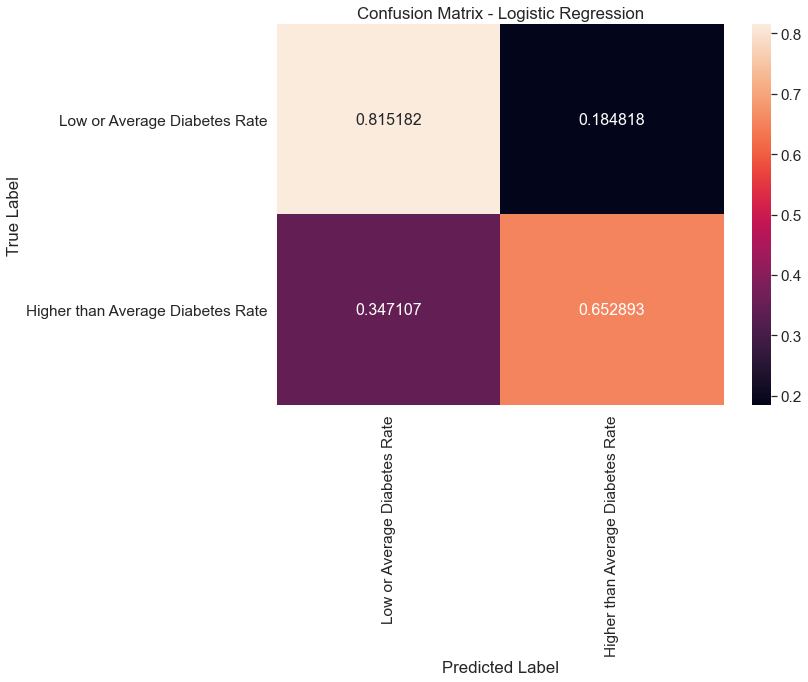

In [26]:
import seaborn as sns

cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Low or Average Diabetes Rate", 1: "Higher than Average Diabetes Rate"})
df_cm.index = ["Low or Average Diabetes Rate", "Higher than Average Diabetes Rate"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(.2, 1, .2),
              'fit_intercept': ['True', 'False'],
              'solver': ['liblinear', 'sag', 'saga']
             }

log_grid_reg = GridSearchCV(log_reg, param_grid, cv=3, iid=False)
log_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(log_grid_reg.cv_results_["mean_test_score"])
best_log_pred = log_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(log_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(log_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', log_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_log_pred, y_validate))

/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packa

/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packa

{'C': 0.2, 'fit_intercept': 'True', 'solver': 'sag'}
Best CV R^2: 0.733021901421119
Validation R^2: 0.7486238532110092
Validation RMSE 0.5013742582033813


/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/alexramiller/anaconda3/lib/python3.8/site-packa

In [215]:
#Feature selection
best_log_coef = log_grid_reg.best_estimator_.coef_.flatten()
best_log_reg_data = pd.DataFrame([best_log_coef, X.columns]).T
best_log_reg_data.columns = ['Coefficient', 'Feature']
best_log_reg_data = best_log_reg_data.dropna(axis=0, how='any')
best_log_reg_data = best_ridge_reg_data.dropna()
best_log_reg_data = best_log_reg_data.where(abs(best_log_reg_data.Coefficient) > np.quantile(abs(best_log_reg_data['Coefficient']), q=0.2))

#### 4.1.2 Ridge Regression

Next up will be the ridge regression, which has some advantages over the linear regression. It penalizes the estimates, particularly for features with a very large beta coefficient. This can help us to narrow in on some of the most important features for our model. Importantly, unlike the LASSO, it does not reduce coefficients to zero.

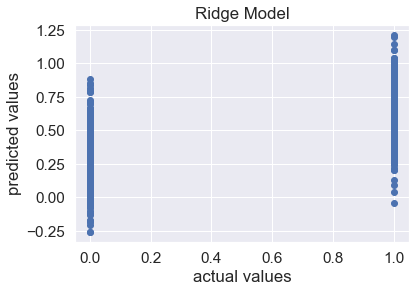

In [27]:
# make and fit a Ridge regression model
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate.drop('CountyFIPS', axis=1))

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Hyperparameter tuning the ridge model

In [28]:
#Defining RMSE
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [29]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.2, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'lsqr'}
Best CV R^2: 0.33714814378450786
Validation R^2: 0.3102106740355932
Validation RMSE 0.41265843785552203


/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [218]:
#Feature selection
best_ridge_coef = ridge_grid_reg.best_estimator_.coef_.flatten()
best_ridge_reg_data = pd.DataFrame([best_ridge_coef, X.columns]).T
best_ridge_reg_data.columns = ['Coefficient', 'Feature']
best_ridge_reg_data = best_ridge_reg_data.dropna(axis=0, how='any')
best_ridge_reg_data = best_ridge_reg_data.where(abs(best_ridge_reg_data.Coefficient) > np.quantile(abs(best_ridge_reg_data['Coefficient']), q=0.2))
best_ridge_reg_data = best_ridge_reg_data.dropna()
best_ridge_reg_data

,Coefficient,Feature
0,1.9859,Obesity_Number
1,2.97511,Physical_Inactivity_Number
3,-0.375609,race_total population_one race
4,0.201532,race_total population_two or more races
5,1.14965,race_total population_one race_1
6,-0.216096,race_total population_one race_white
7,0.664441,race_total population_one race_black or africa...
8,0.52285,race_total population_one race_american indian...
9,-0.328947,race_total population_one race_american indian...
10,-1.687,race_total population_one race_american indian...


#### 4.1.3 LASSO Regression

Following the ridge, we run a LASSO regression. Similarly to the ridge, it penalizes features and actually forces some of them to be zero. As mentioned earlier, this can help us to narrow in on some of the most important features for our model.

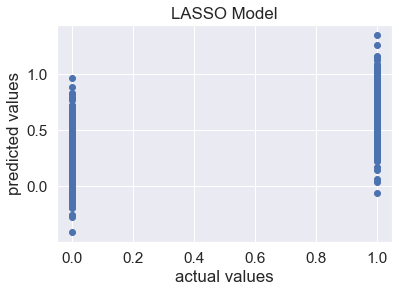

In [76]:
# create and fit the model
lasso_reg = Lasso(max_iter=10000, alpha=0.0005)  

lasso_model = lasso_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate.drop('CountyFIPS', axis=1))

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Comparing Ridge and LASSO coefficients

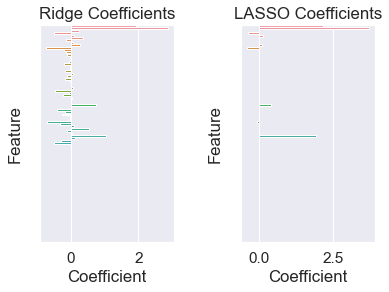

In [81]:
figure = plt.figure()
figure.subplots_adjust(wspace = .5, hspace=.5)
figure.add_subplot(1, 2, 1)
sns.barplot(x="Coefficient", y="Feature", data=ridge_reg_data).set_title("Ridge Coefficients")
plt.yticks(y, " ")
figure.add_subplot(1, 2, 2)
sns.barplot(x="Coefficient", y="Feature", data=lasso_reg_data).set_title("LASSO Coefficients")
plt.yticks(y, " ")
plt.show()

Hyperparameter tuning the LASSO model

In [80]:
param_grid = {'alpha': np.arange(0.0001, 0.001, 0.0001),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.00030000000000000003, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: 0.3402006199028282
Validation R^2: 0.3052395248776789
Validation RMSE 0.4141427344820421


/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [219]:
#Feature selection
best_lasso_coef = lasso_grid_reg.best_estimator_.coef_.flatten()
best_lasso_reg_data = pd.DataFrame([best_lasso_coef, X.columns]).T
best_lasso_reg_data.columns = ['Coefficient', 'Feature']
best_lasso_reg_data = best_lasso_reg_data.dropna(axis=0, how='any')
best_lasso_reg_data = best_lasso_reg_data.where(abs(best_lasso_reg_data.Coefficient) > np.quantile(abs(best_lasso_reg_data['Coefficient']), q=0.2))
best_lasso_reg_data = best_lasso_reg_data.dropna()
best_lasso_reg_data

,Coefficient,Feature
0,2.03907,Obesity_Number
1,3.58417,Physical_Inactivity_Number
3,-0.351795,race_total population_one race
4,0.0171956,race_total population_two or more races
5,0.512462,race_total population_one race_1
8,0.330905,race_total population_one race_american indian...
9,-0.334078,race_total population_one race_american indian...
10,-0.0685608,race_total population_one race_american indian...
16,-1.39597,race_total population_one race_asian_filipino
22,-2.35057,race_total population_one race_native hawaiian...


#### 4.1.4 SVM

Our fourth ML technique is the support vector classifier. One of the benefits of this particular model given our large number of features (including many that are close to 0) is that it is fairly effective in high dimensional spaces that are sparse. One downfall, however, is that is more a "black box" technique. We do not really know much about what is happening "under the hood" and there is no probabilistic explanation for the classifying hyperplane.

In [102]:
from sklearn import svm

# make and fit a SVM
svm = svm.SVC()
svc_model = svm.fit(X_train.drop('CountyFIPS', axis=1), y_train)
#svc_data = pd.DataFrame([svc_model.coef_, X.columns]).T
#svc_data.columns = ['Coefficient', 'Feature']

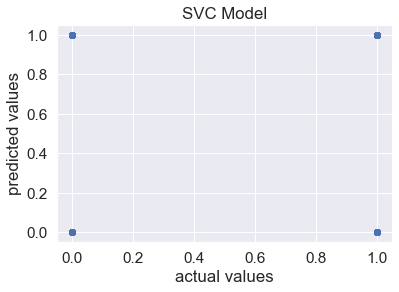

In [103]:
# use the model to make predictions
svc_pred = svc_model.predict(X_validate.drop('CountyFIPS', axis=1))

# plot the predictions
plt.scatter(y_validate, svc_pred)
plt.title('SVC Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Hypertuning the SVM

In [108]:
param_grid = {'C': np.arange(.1, 1, .1),
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False],
             #'probability': [True, False],
             'decision_function_shape': ['ovo', 'ovr']}

svc_grid_reg = GridSearchCV(svc_model, param_grid, cv=3, iid=False)
svc_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(svc_grid_reg.cv_results_["mean_test_score"])
best_svc_pred = svc_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(svc_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(svc_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svc_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_svc_pred, y_validate))

{'C': 0.9, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
Best CV R^2: 0.7575148407987048
Validation R^2: 0.7412844036697248
Validation RMSE 0.5086409306478149


/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


#### 4.1.5 Decision Trees

In [36]:
from sklearn import tree

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-07, random_state=10)

See how it performs:

In [37]:
print(dt_classifier.score(X_train, y_train))
print(dt_classifier.score(X_validate, y_validate))

1.0
0.7119266055045872


In [75]:
param_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [None, 1, 2, 3],
             'min_samples_split': np.arange(2, 5, 1),
             'min_samples_leaf': np.arange(2, 5, 1)}

dt_grid_reg = GridSearchCV(dt_classifier, param_grid, cv=3, iid=False)
dt_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(dt_grid_reg.cv_results_["mean_test_score"])
best_svc_pred = dt_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(dt_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(dt_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', dt_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_svc_pred, y_validate))

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best CV R^2: 0.7287203184025904
Validation R^2: 0.6972477064220184
Validation RMSE 0.5502293099953707


/Users/alexramiller/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


#### 5.3: Test Set

In [260]:
X_test = X_test[X_train.columns.values.tolist()]
best_pred = svc_grid_reg.best_estimator_.predict(X_test.drop('CountyFIPS', axis=1))
print('Best CV R^2:', max(svc_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', svc_grid_reg.score(X_test.drop('CountyFIPS', axis=1), y_test))
print('Test RMSE', rmse(best_pred, y_test))

Best CV R^2: 0.7575148407987048
Test R^2: 0.7516059957173448
Test RMSE 0.4983914167425591
